### Creating PySpark Session

In [1]:
from pyspark.sql import SparkSession

In [2]:
spark = SparkSession.builder.appName('Time-Series').getOrCreate()

### Loading Data

In [3]:
df = spark.read.csv('train.csv', header=True, inferSchema=True)

In [9]:
df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- date: string (nullable = true)
 |-- store_nbr: integer (nullable = true)
 |-- family: string (nullable = true)
 |-- sales: double (nullable = true)
 |-- onpromotion: integer (nullable = true)



In [7]:
df.show(10)

+---+----------+---------+------------+-----+-----------+
| id|      date|store_nbr|      family|sales|onpromotion|
+---+----------+---------+------------+-----+-----------+
|  0|2013-01-01|        1|  AUTOMOTIVE|  0.0|          0|
|  1|2013-01-01|        1|   BABY CARE|  0.0|          0|
|  2|2013-01-01|        1|      BEAUTY|  0.0|          0|
|  3|2013-01-01|        1|   BEVERAGES|  0.0|          0|
|  4|2013-01-01|        1|       BOOKS|  0.0|          0|
|  5|2013-01-01|        1|BREAD/BAKERY|  0.0|          0|
|  6|2013-01-01|        1| CELEBRATION|  0.0|          0|
|  7|2013-01-01|        1|    CLEANING|  0.0|          0|
|  8|2013-01-01|        1|       DAIRY|  0.0|          0|
|  9|2013-01-01|        1|        DELI|  0.0|          0|
+---+----------+---------+------------+-----+-----------+
only showing top 10 rows



### Analysing Average Sales Throught The Years

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [28]:
avg_df = df.groupBy('date').mean('sales').sort('date')

In [24]:
filt = avg_df['date'] >= '2017-01-01'
avg_df = avg_df.filter(filt)

In [29]:
avg_df.show(10)

+----------+------------------+
|      date|        avg(sales)|
+----------+------------------+
|2013-01-01|1.4094382710437712|
|2013-01-02| 278.3908069270483|
|2013-01-03|202.84019703928166|
|2013-01-04|198.91115437300778|
|2013-01-05| 267.8732442362513|
|2013-01-06| 291.6360275465768|
|2013-01-07|188.62110048597077|
|2013-01-08|178.64634005667787|
|2013-01-09|169.77037543097634|
|2013-01-10|145.33221270987647|
+----------+------------------+
only showing top 10 rows



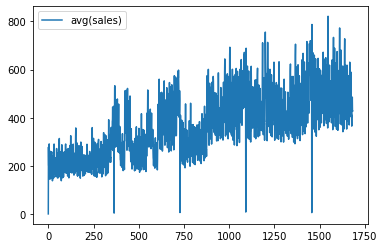

In [55]:
avg_df.toPandas().plot();